In [1]:
import os
os.environ['USE_PYGEOS'] = '0'

from  fiona import listlayers
import os

ukraineMaps=os.path.join('maps','ukraineMaps_all.gpkg')

#layers in maps
listlayers(ukraineMaps)

['airports',
 'roads',
 'country',
 'cities',
 'rivers',
 'mediumAirports',
 'border',
 'municipalities',
 'states',
 'seaports']

In [2]:
############################# EXERCISE 1 ######################################################

#Use two maps of points.

#Compute the distance matrix for both maps.

#Select one row of the distance matrix, and plot the two points with the minimal distance on top of the country of your choosing.

In [3]:
import geopandas as gpd
import pandas as pd
import os
mediumAirports=gpd.read_file(ukraineMaps,layer='mediumAirports')
rivers=gpd.read_file(ukraineMaps,layer='rivers')
seaports=gpd.read_file(ukraineMaps,layer='seaports')

In [4]:
mediumAirports.rename(columns={'name':'Aeropuertos_medianos'},inplace=True)

In [5]:
mediumAirports

,Aeropuertos_medianos,type,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
0,Ihor Sikorsky Kyiv International Airport (Zhul...,medium_airport,50.401940,30.451940,587.0,Kyiv (city),Kyiv,POINT (13171684.889 16479311.223)
1,Odessa International Airport,medium_airport,46.426800,30.676500,172.0,Odessa Oblast,Odessa,POINT (13196667.668 15814518.993)
2,Simferopol International Airport,medium_airport,45.052200,33.975101,639.0,Crimea (Autonomous Republic),Simferopol,POINT (13563644.060 15596101.657)
3,Kharkiv International Airport,medium_airport,49.924801,36.290001,508.0,Kharkiv Oblast,Kharkiv,POINT (13821181.619 16396674.851)
4,Dnipro International Airport,medium_airport,48.357201,35.100601,481.0,Dnipropetrovsk (Sicheslav) Oblast,Dnipro,POINT (13688858.334 16130827.518)
5,Uzhhorod International Airport,medium_airport,48.634300,22.263399,383.0,Zakarpattia Oblast,Uzhhorod,POINT (12260692.263 16177210.724)
6,Zaporizhzhia International Airport,medium_airport,47.867001,35.315701,373.0,Zaporizhia Oblast,Zaporizhia,POINT (13712788.616 16049391.134)
7,Chernivtsi International Airport,medium_airport,48.259300,25.980801,826.0,Chernivtsi Oblast,Chernivtsi,POINT (12674261.104 16114500.763)
8,Ivano-Frankivsk International Airport,medium_airport,48.884201,24.686100,919.0,Ivano-Frankivsk Oblast,Ivano-Frankivsk,POINT (12530222.900 16219261.485)
9,Hostomel Airport,medium_airport,50.603500,30.191900,517.0,Kyiv Oblast,Kiev,POINT (13142754.885 16514470.957)


In [6]:
mediumAirports.head()

,Aeropuertos_medianos,type,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
0,Ihor Sikorsky Kyiv International Airport (Zhul...,medium_airport,50.401940,30.451940,587.0,Kyiv (city),Kyiv,POINT (13171684.889 16479311.223)
1,Odessa International Airport,medium_airport,46.426800,30.676500,172.0,Odessa Oblast,Odessa,POINT (13196667.668 15814518.993)
2,Simferopol International Airport,medium_airport,45.052200,33.975101,639.0,Crimea (Autonomous Republic),Simferopol,POINT (13563644.060 15596101.657)
3,Kharkiv International Airport,medium_airport,49.924801,36.290001,508.0,Kharkiv Oblast,Kharkiv,POINT (13821181.619 16396674.851)
4,Dnipro International Airport,medium_airport,48.357201,35.100601,481.0,Dnipropetrovsk (Sicheslav) Oblast,Dnipro,POINT (13688858.334 16130827.518)


<Axes: >

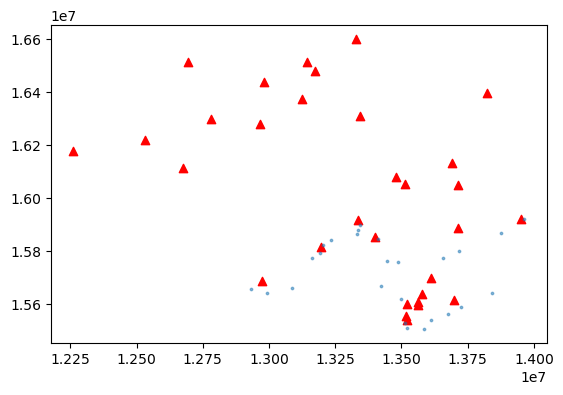

In [7]:
#ploteamos
base=mediumAirports.plot(color='red',marker="^")
seaports.plot(ax=base,alpha=0.5,markersize=3)

In [8]:
seaports.head()

,portName,Country Code,Latitude,Longitude,geometry
0,Kyrylivka,Ukraine,46.350000,35.366667,POINT (13718458.744 15802171.538)
1,Henichesk,Ukraine,46.166667,34.816667,POINT (13657270.072 15772766.738)
2,Balaklava,Ukraine,44.500000,33.600000,POINT (13521913.274 15509851.114)
3,Alushta,Ukraine,44.683333,34.416667,POINT (13612769.219 15538394.769)
4,Sudak,Ukraine,44.850000,34.983333,POINT (13675812.019 15564422.666)


In [9]:
#guardamos la matriz de distancias de los puertos y aeropuertos medianos en km
distanceMatrixKM_sea_air= seaports.set_index('portName').geometry.apply\
                          (lambda g: mediumAirports.set_index('Aeropuertos_medianos').geometry.distance(g)/1000).\
                          sort_index(axis=0).sort_index(axis=1)

<Axes: >

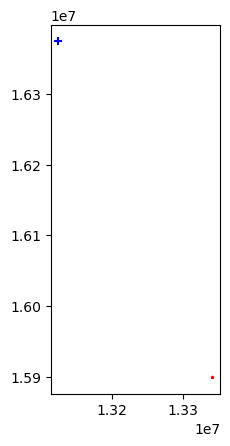

In [10]:
#plot con un aeropuerto mediano y puerto marítimo seleccionado (ambos con distancias mínimas)
base=mediumAirports[mediumAirports.Aeropuertos_medianos=='Bila Tserkva Air Base'].plot(color='blue',marker="+")
seaports[seaports.portName=='Mykolayiv'].plot(ax=base,alpha=1,markersize=3,color='red',marker="*")

In [11]:
##################### EJERCICIO 2 #########################################################################

In [12]:
rivers

,NAME,SYSTEM,geometry
0,Amur,NaN,"MULTILINESTRING ((14241462.452 16326582.942, 1..."
1,Danube,NaN,"MULTILINESTRING ((12925279.899 15658032.359, 1..."
2,Dnieper,NaN,"LINESTRING (13227369.160 16775728.086, 1323925..."


In [13]:
#renombramos 
rivers.rename(columns={'NAME':'Rivers_name'},inplace=True)
#vemos la lista de los ríos
rivers['Rivers_name'].values.tolist()

['Amur', 'Danube', 'Dnieper']

In [14]:
#guardamos la matriz de la distancia entre ríos y aeropuertos medianos
distanceMatrixKM_riv_air=rivers.set_index('Rivers_name').geometry.apply\
(lambda g: mediumAirports.set_index('Aeropuertos_medianos').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)
distanceMatrixKM_riv_air

Aeropuertos_medianos,Bila Tserkva Air Base,Cherkasy International Airport,Chernivtsi International Airport,Dnipro International Airport,Dolgintsevo Air Base,Dzhankoy Airport,Gvardeyskoe Air Base,Hostomel Airport,Ihor Sikorsky Kyiv International Airport (Zhuliany),Ivano-Frankivsk International Airport,...,Oktyabrskoe Air Base,Ozerne Air Base,Rivne International Airport,Saky Air Base,Sevastopol International Airport / Belbek Air Base,Simferopol International Airport,Uzhhorod International Airport,Vinnytsia/Gavyryshivka International Airport,Zaporizhzhia International Airport,Zhovtneve Air Base
Rivers_name,,,,,,,,,,,,,,,,,,,,,
Amur,8.861993,17.853134,213.230453,196.160280,274.417180,628.540116,720.928423,76.864673,41.801287,108.575299,...,688.836912,1.132449,75.996608,724.977802,787.393387,730.977745,157.093815,47.588562,277.579107,638.673038
Danube,729.685463,732.297573,518.821909,785.576051,604.431618,528.449744,473.996184,870.345222,843.158521,684.449483,...,487.707445,772.220780,885.681503,432.128562,436.871850,474.275405,842.186924,614.775941,755.092623,31.983742
Dnieper,130.468122,32.834149,647.901761,23.876637,83.865914,204.419900,279.260750,62.531831,43.664201,732.576930,...,252.158951,238.767084,505.557078,271.617037,330.921028,288.880090,1002.104825,312.363042,0.760716,441.779165


In [15]:
#seleccionamos solo una fila de nuestra matriz
fila2=distanceMatrixKM_riv_air.iloc[[1]]
fila2

Aeropuertos_medianos,Bila Tserkva Air Base,Cherkasy International Airport,Chernivtsi International Airport,Dnipro International Airport,Dolgintsevo Air Base,Dzhankoy Airport,Gvardeyskoe Air Base,Hostomel Airport,Ihor Sikorsky Kyiv International Airport (Zhuliany),Ivano-Frankivsk International Airport,...,Oktyabrskoe Air Base,Ozerne Air Base,Rivne International Airport,Saky Air Base,Sevastopol International Airport / Belbek Air Base,Simferopol International Airport,Uzhhorod International Airport,Vinnytsia/Gavyryshivka International Airport,Zaporizhzhia International Airport,Zhovtneve Air Base
Rivers_name,,,,,,,,,,,,,,,,,,,,,
Danube,729.685463,732.297573,518.821909,785.576051,604.431618,528.449744,473.996184,870.345222,843.158521,684.449483,...,487.707445,772.22078,885.681503,432.128562,436.87185,474.275405,842.186924,614.775941,755.092623,31.983742


In [16]:
# distancia entre el río seleccionado y cada aeropuerto mediano ordenado ascendentemente
distanceMatrixKM_riv_air.loc['Danube'].sort_values()

Aeropuertos_medianos
Zhovtneve Air Base                                       31.983742
Odessa International Airport                            219.794801
Mykolaiv International Airport                          382.913394
Kherson International Airport                           387.553366
Saky Air Base                                           432.128562
Kacha Air Base                                          434.225704
Sevastopol International Airport / Belbek Air Base      436.871850
Gvardeyskoe Air Base                                    473.996184
Simferopol International Airport                        474.275405
Oktyabrskoe Air Base                                    487.707445
Chernivtsi International Airport                        518.821909
Dzhankoy Airport                                        528.449744
Kryvyi Rih International Airport                        599.239539
Dolgintsevo Air Base                                    604.431618
Kirovskoe Air Base                       

In [17]:
#aeropuerto mediano más cercano a río
minsDanube=fila2.idxmin(axis="columns")
minsDanube


Rivers_name
Danube    Zhovtneve Air Base
dtype: object

In [18]:
maxDanube=fila2.idxmax(axis="columns")
maxDanube

Rivers_name
Danube    Kharkiv International Airport
dtype: object

<Axes: >

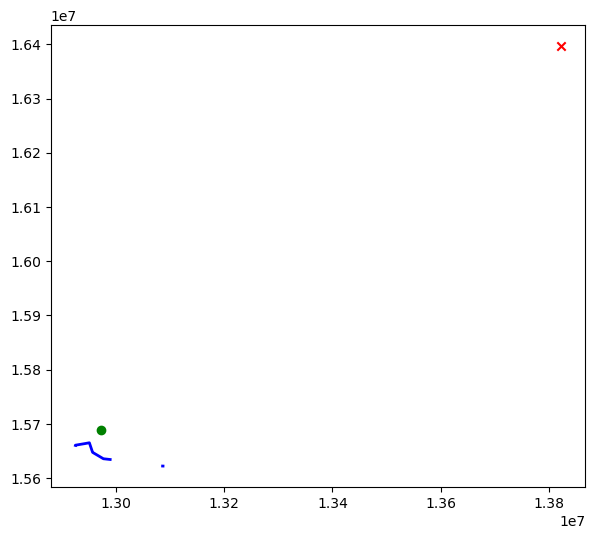

In [19]:
import matplotlib.pyplot as plt

# Obtener las geometrías de los aeropuertos más cercano y más lejano al río Danubio
closest_airport = mediumAirports[mediumAirports['Aeropuertos_medianos'] == 'Zhovtneve Air Base']
farthest_airport = mediumAirports[mediumAirports['Aeropuertos_medianos'] == 'Kharkiv International Airport']

# Crear un gráfico de los aeropuertos y el río Danubio
base = rivers[rivers['Rivers_name'] == 'Danube'].plot(color='blue', linewidth=2, figsize=(8, 6))
closest_airport.plot(ax=base, color='green', marker='o')
farthest_airport.plot(ax=base, color='red', marker='x')


In [20]:
#creamos el mapa iterativo de la cuenca Yukon y el aeropuerto mediano más cercano y lejano
base=rivers[rivers.Rivers_name.str.contains('Danube')].explore()
#aeropuertos medianos más cercanos
mediumAirports[mediumAirports.Aeropuertos_medianos.isin(minsDanube)].explore(m=base,color='purple',marker_kwds=dict(radius=10))
# aeropuertos medianos más lejanos
mediumAirports[mediumAirports.Aeropuertos_medianos.isin(maxDanube)].explore(m=base,color='green',marker_kwds=dict(radius=5))

In [21]:
############################# EJERCICIO 3 ###################################################

In [22]:
# no se cuenta con un sistema de cuenca, por lo que se crean polígonos a partir de los ríos para ejemplicar el ejercicio pedido:

In [23]:
rivers.convex_hull

0    POLYGON ((14241462.452 16326582.942, 12304742....
1    POLYGON ((13090092.313 15622291.398, 13084183....
2    POLYGON ((13386319.477 15845999.873, 13221817....
dtype: geometry

<Axes: >

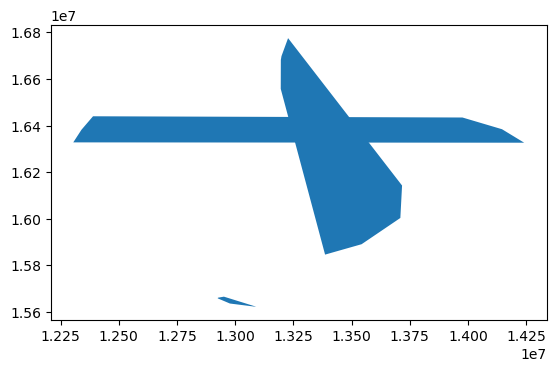

In [24]:
rivers.convex_hull.plot()

In [25]:
#creamos un data frame con la geometría de los convex hull
rivers_hulls=rivers.convex_hull.to_frame()
#creamos una nueva columna y asignamos los nombres de cada cuenca
rivers_hulls['Rivers_name']=['Amur', 'Danube', 'Dnieper']
#renombramos
rivers_hulls.rename(columns={0:'geometry'},inplace=True)
#geometry pasa a ser de tipo GeoSeries
rivers_hulls=rivers_hulls.set_geometry('geometry')
#asignamos el crs
rivers_hulls.crs="EPSG:5641"
rivers_hulls

,geometry,Rivers_name
0,"POLYGON ((14241462.452 16326582.942, 12304742....",Amur
1,"POLYGON ((13090092.313 15622291.398, 13084183....",Danube
2,"POLYGON ((13386319.477 15845999.873, 13221817....",Dnieper


In [26]:
#Creamos la matriz de las distancias del convex hull de los ríos y los aeropuertos medianos
distanceMatrixKM_rivHull_air=rivers_hulls.set_index('Rivers_name').geometry.apply\
(lambda g: mediumAirports.set_index('Aeropuertos_medianos').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

distanceMatrixKM_rivHull_air

Aeropuertos_medianos,Bila Tserkva Air Base,Cherkasy International Airport,Chernivtsi International Airport,Dnipro International Airport,Dolgintsevo Air Base,Dzhankoy Airport,Gvardeyskoe Air Base,Hostomel Airport,Ihor Sikorsky Kyiv International Airport (Zhuliany),Ivano-Frankivsk International Airport,...,Oktyabrskoe Air Base,Ozerne Air Base,Rivne International Airport,Saky Air Base,Sevastopol International Airport / Belbek Air Base,Simferopol International Airport,Uzhhorod International Airport,Vinnytsia/Gavyryshivka International Airport,Zaporizhzhia International Airport,Zhovtneve Air Base
Rivers_name,,,,,,,,,,,,,,,,,,,,,
Amur,0.000000,17.853134,213.230453,196.160280,274.417180,628.540116,720.928423,76.864673,41.801287,108.575299,...,688.836912,0.000000,75.996608,724.977802,787.393387,730.977745,157.093815,47.588562,277.579107,638.673038
Danube,729.685463,732.297573,518.821909,785.576051,604.431618,528.449744,473.996184,870.345222,843.158521,684.449483,...,487.707445,772.220780,885.681503,432.128562,436.871850,474.275405,842.186924,614.775941,755.092623,28.880523
Dnieper,116.724398,0.000000,618.468809,0.000000,0.000000,204.419900,279.260750,62.531831,43.664201,730.536896,...,252.158951,238.767084,505.557078,271.617037,330.921028,288.880090,1001.777950,292.741407,0.760716,441.779165


In [27]:
#aeropuertos medianos más cercanos a las cuencas
mins=distanceMatrixKM_rivHull_air.idxmin(axis="columns")
mins

Rivers_name
Amur                Bila Tserkva Air Base
Danube                 Zhovtneve Air Base
Dnieper    Cherkasy International Airport
dtype: object

In [28]:
#aeropuertos medianos más lejanos a las cuencas
maxs=distanceMatrixKM_rivHull_air.idxmax(axis="columns")
maxs

Rivers_name
Amur       Sevastopol International Airport / Belbek Air ...
Danube                         Kharkiv International Airport
Dnieper                       Uzhhorod International Airport
dtype: object

In [29]:
# plotemos
base=rivers_hulls.explore()
#aeropuertos más cercanos
mediumAirports[mediumAirports.Aeropuertos_medianos.isin(mins)].explore(m=base,color='indigo',marker_kwds=dict(radius=10))
#aeropuertos no cercanos
mediumAirports[~mediumAirports.Aeropuertos_medianos.isin(maxs)].explore(m=base,color='lightcoral',marker_kwds=dict(radius=5))

In [30]:
###########################EJERCICIO 4 ########################################################

In [31]:
# Aplicaremos buffer, para ello vemos la matriz que hicimos 
distanceMatrixKM_riv_air

Aeropuertos_medianos,Bila Tserkva Air Base,Cherkasy International Airport,Chernivtsi International Airport,Dnipro International Airport,Dolgintsevo Air Base,Dzhankoy Airport,Gvardeyskoe Air Base,Hostomel Airport,Ihor Sikorsky Kyiv International Airport (Zhuliany),Ivano-Frankivsk International Airport,...,Oktyabrskoe Air Base,Ozerne Air Base,Rivne International Airport,Saky Air Base,Sevastopol International Airport / Belbek Air Base,Simferopol International Airport,Uzhhorod International Airport,Vinnytsia/Gavyryshivka International Airport,Zaporizhzhia International Airport,Zhovtneve Air Base
Rivers_name,,,,,,,,,,,,,,,,,,,,,
Amur,8.861993,17.853134,213.230453,196.160280,274.417180,628.540116,720.928423,76.864673,41.801287,108.575299,...,688.836912,1.132449,75.996608,724.977802,787.393387,730.977745,157.093815,47.588562,277.579107,638.673038
Danube,729.685463,732.297573,518.821909,785.576051,604.431618,528.449744,473.996184,870.345222,843.158521,684.449483,...,487.707445,772.220780,885.681503,432.128562,436.871850,474.275405,842.186924,614.775941,755.092623,31.983742
Dnieper,130.468122,32.834149,647.901761,23.876637,83.865914,204.419900,279.260750,62.531831,43.664201,732.576930,...,252.158951,238.767084,505.557078,271.617037,330.921028,288.880090,1002.104825,312.363042,0.760716,441.779165


In [32]:
#distancia mínima entre el río Peace y cualquier aeropuerto
distanceMatrixKM_riv_air.loc['Dnieper'].min()

0.7607158267482277

In [37]:
#guardamos nuestra distancia mínima y la pasamos a metros
minMts=distanceMatrixKM_riv_air.loc['Dnieper'].min()*1000

#creamos un buffer que es un polígono
rivers[rivers.Rivers_name=='Dnieper'].buffer(distance = minMts)

2    POLYGON ((13239910.472 16756150.606, 13239945....
dtype: geometry

In [38]:
# vemos el buffer del río AMur con la distancia mínima
bufferAroundDnieper=rivers[rivers.Rivers_name=='Dnieper'].buffer(distance = minMts)
bufferAsBase=bufferAroundDnieper.explore(color='lightpink')
rivers[rivers.Rivers_name=='Dnieper'].explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})

In [39]:

# plotting
rivers[rivers.Rivers_name=='Dnieper'].explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})
mediumAirports.explore(m=bufferAsBase,color='black')

In [40]:
#clipeamos los aeropuertos que están solo en el buffer
riversWithinBuffer=mediumAirports.clip(mask=bufferAroundDnieper)

riversWithinBuffer

,Aeropuertos_medianos,type,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry


In [41]:
#ploteamos:
bufferAsBase=bufferAroundDnieper.explore(color='lightseagreen')
rivers[rivers.Rivers_name=='Dnieper'].explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})
riversWithinBuffer.explore(m=bufferAsBase,color='black')

IndexError: list index out of range

In [ ]:
########################################################################################################################

In [ ]:
# PARTE 2: Using data from spatial objects